Data Preprocessing

In [1]:
import pandas as pd

file_path = 'bankPortfolios.csv'  

column_names = [
    'Loans_Construction_and_Land', 'Loans_Farmland', 
    'Loans_1-4_Family_Residential', 'Loans_Multifamily_Residential', 
    'Loans_NonFarm_NonResidential', 'Agricultural_Loans', 
    'Commercial_Industrial_Loans', 'Loans_to_Individuals', 
    'Other_Loans', 'Obligations_of_US_States_PoliticalSub', 
    'Held_to_Maturity_Securities', 'Available_for_Sale_Securities', 
    'Premises_and_Fixed_Assets', 'Cash', 'Debt', 'Default'
]

data = pd.read_csv(file_path, header=None, names=column_names)

print(data.head())


   Loans_Construction_and_Land  Loans_Farmland  Loans_1-4_Family_Residential  \
0                       2699.0          6107.0                        9965.0   
1                     759920.0          6480.0                      588660.0   
2                     129080.0           729.0                       72972.0   
3                      57828.0          1449.8                       27634.0   
4                       1021.0         14222.0                        3186.0   

   Loans_Multifamily_Residential  Loans_NonFarm_NonResidential  \
0                         1036.0                        2924.0   
1                       528110.0                     1188700.0   
2                         3310.0                       73909.0   
3                         1739.0                       39274.0   
4                           35.0                        4776.0   

   Agricultural_Loans  Commercial_Industrial_Loans  Loans_to_Individuals  \
0              3786.0                       45

In [2]:
missing_values = data.isnull().sum()
print(missing_values)

Loans_Construction_and_Land              0
Loans_Farmland                           0
Loans_1-4_Family_Residential             0
Loans_Multifamily_Residential            0
Loans_NonFarm_NonResidential             0
Agricultural_Loans                       0
Commercial_Industrial_Loans              0
Loans_to_Individuals                     0
Other_Loans                              0
Obligations_of_US_States_PoliticalSub    0
Held_to_Maturity_Securities              0
Available_for_Sale_Securities            0
Premises_and_Fixed_Assets                0
Cash                                     0
Debt                                     0
Default                                  0
dtype: int64


Building Model

In [3]:
from sklearn.model_selection import train_test_split

X = data.drop('Default', axis=1)
y = data['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (6226, 15)
Test set size: (1557, 15)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


logistic_model = LogisticRegression()
tree_model = DecisionTreeClassifier()


logistic_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

print("Logistic Regression model and Decision Tree model have been trained.")


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression model and Decision Tree model have been trained.


In [5]:
from sklearn.metrics import classification_report, accuracy_score


logistic_predictions = logistic_model.predict(X_test)
tree_predictions = tree_model.predict(X_test)


print("Logistic Regression Performance:")
print(classification_report(y_test, logistic_predictions))
print(f"Accuracy: {accuracy_score(y_test, logistic_predictions)}\n")

print("Decision Tree Performance:")
print(classification_report(y_test, tree_predictions))
print(f"Accuracy: {accuracy_score(y_test, tree_predictions)}")


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1492
           1       0.44      0.35      0.39        65

    accuracy                           0.95      1557
   macro avg       0.71      0.67      0.68      1557
weighted avg       0.95      0.95      0.95      1557

Accuracy: 0.9543994861913937

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1492
           1       0.21      0.25      0.22        65

    accuracy                           0.93      1557
   macro avg       0.59      0.60      0.59      1557
weighted avg       0.94      0.93      0.93      1557

Accuracy: 0.928709055876686


In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score


logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions, average='weighted')
logistic_recall = recall_score(y_test, logistic_predictions, average='weighted')
logistic_f1 = f1_score(y_test, logistic_predictions, average='weighted')

print("Logistic Regression Performance:")
print(f"Accuracy: {logistic_accuracy}")
print(f"Precision: {logistic_precision}")
print(f"Recall: {logistic_recall}")
print(f"F1-Score: {logistic_f1}\n")

tree_accuracy = accuracy_score(y_test, tree_predictions)
tree_precision = precision_score(y_test, tree_predictions, average='weighted')
tree_recall = recall_score(y_test, tree_predictions, average='weighted')
tree_f1 = f1_score(y_test, tree_predictions, average='weighted')

print("Decision Tree Performance:")
print(f"Accuracy: {tree_accuracy}")
print(f"Precision: {tree_precision}")
print(f"Recall: {tree_recall}")
print(f"F1-Score: {tree_f1}")


Logistic Regression Performance:
Accuracy: 0.9543994861913937
Precision: 0.9499761019252887
Recall: 0.9543994861913937
F1-Score: 0.9519650243264031

Decision Tree Performance:
Accuracy: 0.928709055876686
Precision: 0.9350691309677814
Recall: 0.928709055876686
F1-Score: 0.9317935819006865


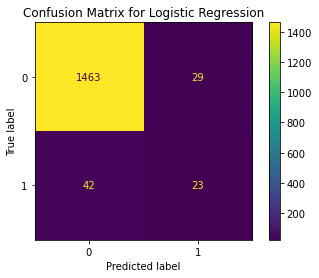

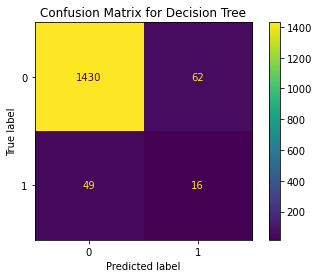

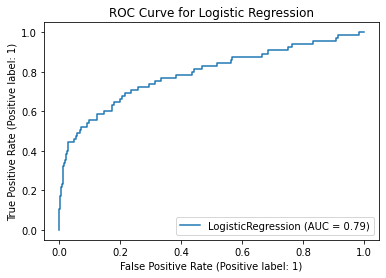

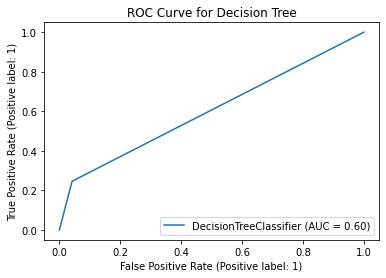

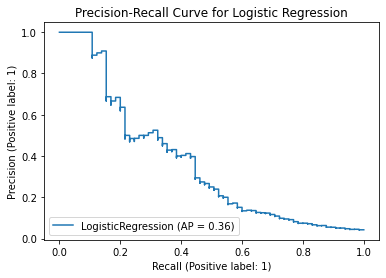

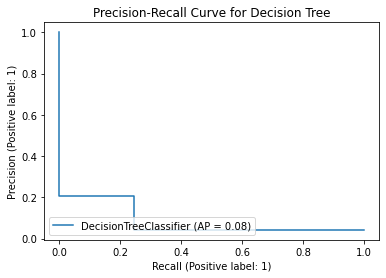

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve



plot_confusion_matrix(logistic_model, X_test, y_test)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

plot_confusion_matrix(tree_model, X_test, y_test)
plt.title('Confusion Matrix for Decision Tree')
plt.show()

plot_roc_curve(logistic_model, X_test, y_test)
plt.title('ROC Curve for Logistic Regression')
plt.show()

plot_roc_curve(tree_model, X_test, y_test)
plt.title('ROC Curve for Decision Tree')
plt.show()

plot_precision_recall_curve(logistic_model, X_test, y_test)
plt.title('Precision-Recall Curve for Logistic Regression')
plt.show()


plot_precision_recall_curve(tree_model, X_test, y_test)
plt.title('Precision-Recall Curve for Decision Tree')
plt.show()


Cross Validation

In [11]:
from sklearn.model_selection import cross_validate


logistic_cv_results = cross_validate(logistic_model, X, y, cv=5, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])


tree_cv_results = cross_validate(tree_model, X, y, cv=5, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])


print("Logistic Regression Cross-Validation Metrics:")
for metric, score in logistic_cv_results.items():
    print(f"{metric}: Mean = {np.mean(score):.3f}, Std = {np.std(score):.3f}")


print("\nDecision Tree Cross-Validation Metrics:")
for metric, score in tree_cv_results.items():
    print(f"{metric}: Mean = {np.mean(score):.3f}, Std = {np.std(score):.3f}")


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Logistic Regression Cross-Validation Metrics:
fit_time: Mean = 0.295, Std = 0.018
score_time: Mean = 0.014, Std = 0.001
test_accuracy: Mean = 0.951, Std = 0.020
test_precision_weighted: Mean = 0.949, Std = 0.007
test_recall_weighted: Mean = 0.951, Std = 0.020
test_f1_weighted: Mean = 0.948, Std = 0.012

Decision Tree Cross-Validation Metrics:
fit_time: Mean = 0.237, Std = 0.012
score_time: Mean = 0.013, Std = 0.001
test_accuracy: Mean = 0.922, Std = 0.034
test_precision_weighted: Mean = 0.937, Std = 0.002
test_recall_weighted: Mean = 0.922, Std = 0.034
test_f1_weighted: Mean = 0.928, Std = 0.019
